In [1]:
import pandas as pd

df = pd.read_csv('/home/pilli007/Documents/pes_sem2/ML/pes_ml/datasets/BMI.csv')

df.head(5)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df[['Gender']])


/home/pilli007/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:3]
y = df['Index']

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50)

rfc.fit(xTrain, yTrain)

RandomForestClassifier(n_estimators=50)

In [32]:
rfc.score(xTest, yTest)

0.85

In [33]:
rfc.score(xTrain, yTrain)

1.0

In [34]:
len(rfc.estimators_)

50

In [35]:
rfc.predict(xTest)

array([5, 3, 4, 2, 5, 4, 5, 1, 4, 5, 5, 3, 5, 4, 4, 4, 2, 5, 5, 3, 4, 4,
       5, 0, 5, 4, 5, 4, 4, 3, 3, 5, 2, 5, 4, 5, 2, 3, 4, 5, 3, 2, 5, 4,
       5, 3, 5, 5, 1, 5, 4, 0, 3, 2, 5, 1, 2, 4, 5, 2, 2, 0, 5, 5, 1, 5,
       2, 5, 4, 3, 4, 4, 5, 5, 5, 5, 5, 1, 4, 5, 5, 5, 3, 4, 2, 5, 4, 5,
       5, 5, 2, 5, 3, 5, 4, 4, 4, 3, 5, 3])

In [36]:
xt = xTest.iloc[1:2]
xt

,Gender,Height,Weight
340,0,155,71


In [37]:
rfc.predict(xt)

array([3])

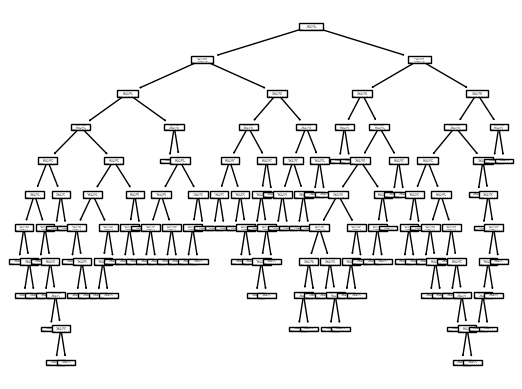

In [38]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

plot_tree(rfc.estimators_[5])
plt.show()


In [39]:
#if want to see all the possible trees use grid search



In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

bgc = BaggingClassifier(base_estimator=LogisticRegression())

bgc.fit(xTrain, yTrain)


/home/pilli007/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/pilli007/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pilli007/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:

BaggingClassifier(base_estimator=LogisticRegression())

In [51]:
#by using bagging classifier we can only use one algorithm
#underfitting scenario use boosting
#by default takes only decision tree

from sklearn.ensemble import AdaBoostClassifier

bst = AdaBoostClassifier(n_estimators=100)

bst.fit(xTrain, yTrain)

AdaBoostClassifier(n_estimators=100)

In [52]:
bst.predict(xTest)
bst.score(xTest, yTest)

0.32

In [54]:
#if want to choose differnet algorithm

from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

#eastimators need an object or label 
sc = StackingClassifier(estimators=[('svc', SVC()), ('logistic regression', LogisticRegression())])


In [55]:
sc.fit(xTrain, yTrain)

/home/pilli007/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pilli007/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

StackingClassifier(estimators=[('svc', SVC()),
                               ('logistic regression', LogisticRegression())])

In [ ]:
#here logistic regressiion is selected
